In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

# 1. Gradiente descendiente

creamos una función de **dos** variables:

$$f(p_0, p_1) = (p_0-1/3)^2 + (p_1-2/3)^2$$

pero que las codifico en un único argumento lista en su implementación (para que sea compatible con las rutinas que usamos más adelante)

In [2]:
def f(p):
    return (p[0]-1./3)**2 + p[1]**2

hago una malla de 40$\times$40 para pintar los contornos de la función

Mesh size (40, 40)


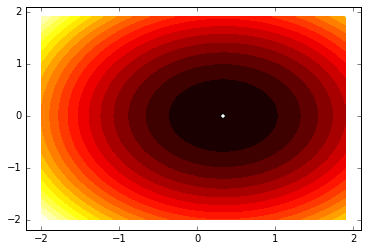

In [3]:
def plot_contour(f, x_points, y_points,  x_range=np.arange(-2, 2, .1), y_range=np.arange(-2, 2, .1),):
    X, Y = np.meshgrid(x_range, y_range)
    print "Mesh size", X.shape
    Z = f([X,Y])
    CS = plt.contourf(X, Y, Z, 20, cmap=plt.cm.hot)
    plt.scatter(x_points, y_points, c="white")
    return X, Y, Z
    
P0, P1, Z = plot_contour(f, [1./3], [0])

una aproximación de fuerza bruta para encontrar el mínimo de la función es buscarlo en la malla. Pero si la malla no tiene la resolución correcta, perdemos el mínimo.

In [4]:
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
print "Grid minimum=%.5f"%Z[min_idx], "at x=%.3f y=%.3f"%(P0[min_idx], P1[min_idx])

Grid minimum=0.00111 at x=0.300 y=0.000


Definimos las derivadas y formamos el gradiente. Observa como el negativo del gradiente **es un vector** que apunta a la dirección de mayor descenso

In [5]:
def df_p0(p):
    return 2*(p[0]-1./3)

def df_p1(p):
    return p[1]

def grad_f(p):
    return np.array([df_p0(p), df_p1(p)]) 

Mesh size (40, 40)
[-1.38726969 -0.76367314]
[-0.32541649 -0.07221649]


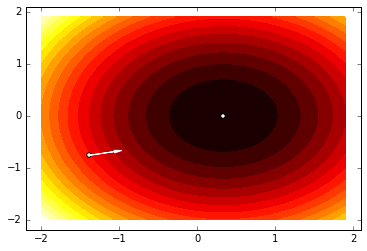

In [6]:
plot_contour(f, [1./3], [0])
r = np.random.random(size=2)*4-2
grad = grad_f(r)
grad = grad / np.linalg.norm(grad) / 3
print r
print grad
plt.scatter(r[0],r[1], c="white")
plt.arrow(r[0], r[1], -grad[0], -grad[1], head_width=0.05, head_length=0.1, fc='white', ec='white')


asi que damos pasitos en la dirección del mayor gradiente descendiente:

- limitamos el número máximo de pasos
- en cuanto vemos que el gradiente es demasiado pequeño paramos la iteración

Mesh size (40, 40)
0 [ 1.6141245  -1.02062496] [ 0.25615823 -0.1020625 ] 0.275742259876
1 [ 1.35796627 -0.91856246] [ 0.20492659 -0.09185625] 0.224571761611
2 [ 1.15303968 -0.82670622] [ 0.16394127 -0.08267062] 0.18360602282
3 [ 0.98909841 -0.7440356 ] [ 0.13115302 -0.07440356] 0.150787941248
4 [ 0.8579454  -0.66963204] [ 0.10492241 -0.0669632 ] 0.124470009689
5 [ 0.75302298 -0.60266883] [ 0.08393793 -0.06026688] 0.10333282794
6 [ 0.66908505 -0.54240195] [ 0.06715034 -0.05424019] 0.0863201451552
7 [ 0.60193471 -0.48816175] [ 0.05372028 -0.04881618] 0.0725870991441
8 [ 0.54821443 -0.43934558] [ 0.04297622 -0.04393456] 0.061458936568
9 [ 0.50523821 -0.39541102] [ 0.03438098 -0.0395411 ] 0.0523979988235
10 [ 0.47085724 -0.35586992] [ 0.02750478 -0.03558699] 0.0449771827567
11 [ 0.44335246 -0.32028293] [ 0.02200382 -0.03202829] 0.0388584590423
12 [ 0.42134863 -0.28825463] [ 0.01760306 -0.02882546] 0.0337753617029
13 [ 0.40374557 -0.25942917] [ 0.01408245 -0.02594292] 0.0295186430197
14 [ 0

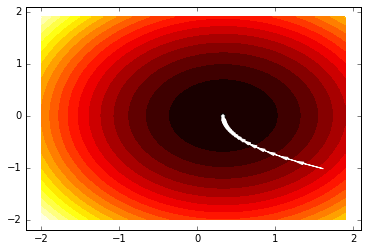

In [15]:
plot_contour(f, [1./3], [0])

step_size   = 0.1
max_steps   = 100
min_delta   = 1e-2

r = np.random.random(size=2)*4-2

for i in range(max_steps):
    delta = grad_f(r) * step_size
    if np.linalg.norm(delta)<min_delta:
        break
    print i, r, delta, np.linalg.norm(delta)
    plt.arrow(r[0], r[1], -delta[0], -delta[1], head_width=0.05, head_length=0.1, fc='white', ec='white')
    r    -= delta
    
    
print "Minimum:", r

# 2. Optimización general

usamos las librerías de minimización de **scipy** para encontrar el mínimo por un proceso iterativo que empieza desde una posición que definimos aleatoriamente.

In [8]:
p_init = np.random.random(size=2)*2
print "init point", p_init
result = minimize(f, p_init,  method="BFGS")
print result

init point [ 0.00372632  0.60550126]
      fun: 9.557053212311544e-17
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ -3.57511454e-09,   8.50511839e-09])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([  3.33333324e-01,  -3.19802140e-09])


In [9]:
print "minimum=%.5f"%result.fun, "at x=%.3f y=%.3f"%(result.x[0], result.x[1])

minimum=0.00000 at x=0.333 y=-0.000


# 3. Usamos las derivadas para optimizar más rápido

In [10]:
p_init = np.random.random(size=2)*2
print "init point", p_init
result = minimize(f, p_init, jac=grad_f, method="BFGS")
print result


init point [ 1.61498003  1.13359093]
      fun: 7.216861102618787e-16
 hess_inv: array([[  5.00560546e-01,  -1.25777238e-05],
       [ -1.25777238e-05,   1.00000028e+00]])
      jac: array([ -5.37149119e-08,   6.02637080e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([  3.33333306e-01,   6.02637080e-10])


# 4.  Usamos cómputo simbólico para ayudarnos con las derivadas

primero definimos nuestra función usando variables simbólicas (**no variables normales de python**)

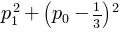

In [11]:
sym.init_printing(use_latex=True)
p_0, p_1 = sym.symbols("p_0, p_1")
f_sym = (p_0-sym.S("1/3"))**2 + p_1**2
f_sym

le pedimos a `sympy` que nos haga las derivadas

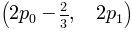

In [12]:
df_p0_sym = sym.diff(f_sym, p_0)
df_p1_sym = sym.diff(f_sym, p_1)
df_p0_sym, df_p1_sym

y convertimos la función original y la derivada a funciones normales de python (en este caso forzamos que sea de un solo argumento compuesto por dos valores, observa la **doble lista**)

In [13]:
f1     = sym.lambdify([[p_0,p_1]], f_sym, "numpy")
df1_p0 = sym.lambdify([[p_0,p_1]], df_p0_sym, "numpy")
df1_p1 = sym.lambdify([[p_0,p_1]], df_p1_sym, "numpy")
print f1([1./3, 0]), df1_p0([1./3, 0]), df1_p1([1./3, 0])

0.0 0.0 0


y ahora ya podemos minimizar eficientemente, sin haber tenido que derivar manualmente!!

In [14]:
def jac_f1(p):
    return np.array([df1_p0(p), df1_p1(p)])

p_init = np.random.random(size=2)*2
print "init point", p_init
result = minimize(f1, p_init, jac=jac_f1, method="BFGS")
print result

init point [ 1.55178994  0.54718349]
      fun: 4.6009629492901676e-35
 hess_inv: array([[ 0.58391312, -0.18685595],
       [-0.18685595,  0.91608688]])
      jac: array([  0.00000000e+00,  -1.35660797e-17])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([  3.33333333e-01,  -6.78303984e-18])
